#MAJOR 2- RANDOM FOREST



In [0]:
#mount the drive for accessing the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#checking the gpu for tensorflow

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2216297801004431993
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9261371543184261176
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4245860295538836463
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8185910357940848198
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv("drive/My Drive/major2/random forest/DATASET_19classes.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(df.head())
print(df.shape)
print(df.columns)

                                       text_instance  ... Unnamed: 8
0  Will Smith Joins Diplo And Nicky Jam For The 2...  ...        NaN
1                           Of course it has a song.  ...        NaN
2    Hugh Grant Marries For The First Time At Age 57  ...        NaN
3  The actor and his longtime girlfriend Anna Ebe...  ...        NaN
4  Jim Carrey Blasts 'Castrato' Adam Schiff And D...  ...        NaN

[5 rows x 9 columns]
(368536, 9)
Index(['text_instance', 'category', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [0]:
print(len(df.category.unique()))

625


In [0]:
#to remove the aomalies from the dataset 

filter="^[A-Z]+$"
fo=df['category'].str.contains(filter)
df=df[fo]

In [0]:
print(len(df.category.unique()))

for i in df.category.unique():
    print(i)

16
ENTERTAINMENT
NEWS
IMPACT
POLITICS
VOICES
WOMEN
COMEDY
SPORTS
TRAVEL
PARENTING
ARTS
STYLE
ENVIRONMENT
LIVING
WORLDPOST
WELLNESS


In [0]:
df.head()

,text_instance,category,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Of course it has a song.,ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The actor and his longtime girlfriend Anna Ebe...,ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#to remove the NaN columns from the dataset
df=df.drop(df.columns[2:8],axis=1)

In [0]:
df=df.drop(df.columns[-1],axis=1)
print(df.head(5))
df.shape

                                       text_instance       category
0  Will Smith Joins Diplo And Nicky Jam For The 2...  ENTERTAINMENT
1                           Of course it has a song.  ENTERTAINMENT
2    Hugh Grant Marries For The First Time At Age 57  ENTERTAINMENT
3  The actor and his longtime girlfriend Anna Ebe...  ENTERTAINMENT
4  Jim Carrey Blasts 'Castrato' Adam Schiff And D...  ENTERTAINMENT


(321927, 2)

In [0]:
df = df[pd.notnull(df['text_instance'])]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306866 entries, 0 to 368535
Data columns (total 2 columns):
text_instance    306866 non-null object
category         306866 non-null object
dtypes: object(2)
memory usage: 7.0+ MB


In [0]:
df['category_id'] = df['category'].factorize()[0]
from io import StringIO
category_id_df = df[['text_instance', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'text_instance']].values)

In [0]:
print(df.head)
print(df.shape)
print(df.columns)

<bound method NDFrame.head of                                             text_instance  ... category_id
0       Will Smith Joins Diplo And Nicky Jam For The 2...  ...           0
1                                Of course it has a song.  ...           0
2         Hugh Grant Marries For The First Time At Age 57  ...           0
3       The actor and his longtime girlfriend Anna Ebe...  ...           0
4       Jim Carrey Blasts 'Castrato' Adam Schiff And D...  ...           0
...                                                   ...  ...         ...
368531  THREE million children in this country take dr...  ...           7
368532  TSA Workers Suspended From Newark Airport For ...  ...           7
368533  An official with the local union told the site...  ...           7
368534  Kylie, Kendall Jenner Cover Teen Vogue March 2...  ...           7
368535  She lands a Teen Vogue cover, of course. Altho...  ...           7

[306866 rows x 3 columns]>
(306866, 3)
Index(['text_instance', 'categ

#to check the imbalance in the dataset

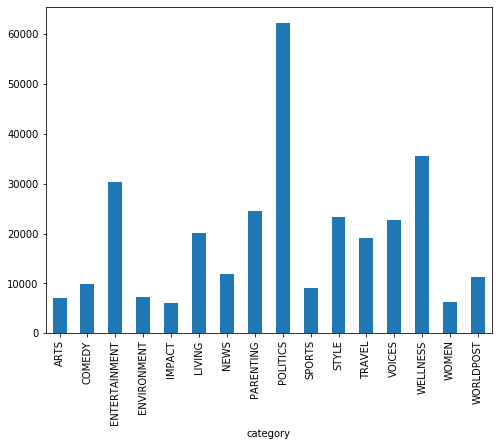

In [0]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').text_instance.count().plot.bar(ylim=0)
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features1 = tfidf.fit_transform(df.text_instance[:100000]).toarray()
features2 = tfidf.fit_transform(df.text_instance[100000:200000]).toarray()
features3 = tfidf.fit_transform(df.text_instance[200000:]).toarray()
labels1 = df.category_id[:100000]
labels2 = df.category_id[100000:200000]
labels3 = df.category_id[200000:]
print(features1.shape)
print(features2.shape)
print(features3.shape)


In [0]:
print(type(features1))
print(type(labels1))
#if the type of the features and labels object is a dataframe
features=features1.append(features2)
features=features.append(features3)

labels=labels1.append(labels2)
labels=labels.append(labels3)

In [0]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for text_instance, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text_instance'], df['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

In [0]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

In [0]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

In [0]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

In [0]:
rom sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [0]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
cv_df.groupby('model_name').accuracy.mean()


In [0]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

In [0]:
model.fit(features, labels)


In [0]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [0]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['category'].unique()))